### Logistic Regression Classifier in Python - Basic Introduction



In logistic regression... basically, you are performing linear regression but applying a sigmoid function for the outcome.

#### Sigmoid  / Logistic Function

$p =1 / 1 + e^{-y}$

#### Properties of Logistic Regression

* The dependent variable follows a Bernoulli Distribution(The Bernoulli Distribution is a fundamental concept in probability theory and statistics. It describes the probability distribution of a random variable that has only two possible outcomes:)
* Estimation is maximum likelihood estimation (MLE)

#### Advantages
* Straight forward, easy to implement, doesn't require high compute power, easy to interpret, used widely.
* Doesn't require feature scaling and provides a probability score for observations.

#### Disadvantages
* Not able to handle a large number of category features/variables.
* Vulnerable to overfitting.

Most apt for Binary Target
#### Data
Is the candy chocolate?  Let's find out because... yum

(This intro was built on a candy-data.csv dataset in DataScience folder also found at

https://github.com/fivethirtyeight/data/blob/master/candy-power-ranking/candy-data.csv )

In [21]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [22]:
# Built in colab with local data upload

#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [23]:
# Explore data

#df = pd.read_csv(io.StringIO(uploaded['candy-data.csv'].decode('ISO-8859-1')))
#df = df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent','chocolate']]

#df.head()

In [24]:
df = pd.read_csv("DATA/candy-data.csv", encoding="latin1")
df = df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent','chocolate']]
df.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


In [25]:
# Split data into train test sets

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2, random_state =27)

In [26]:
# Creating the dataframes for training and test datasets
train_df = trainingSet
test_df = testSet

#Clean the missing values if needed
#train_df = train_df.dropna()
#test_df = test_df.dropna()


In [27]:
#Since the data is already split into Train and Test datasets, load the values into X_train, X_test, y_train, y_test
#X_train = train_df.iloc[:,:-1].values
#y_train = train_df.iloc[:,1].values
#X_test = test_df.iloc[:,:-1].values
#y_test = test_df.iloc[:,1].values

X_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']]

y_train = train_df["chocolate"]

X_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']]

y_test = test_df["chocolate"]



In [28]:

y_test.head()

38    1
59    1
58    0
76    1
78    0
Name: chocolate, dtype: int64

### Data Exploration

Rule of Thumb: A common rule of thumb is to have at least 10 events per variable (EPV) in the less frequent category of the binary outcome. This means if your outcome is "yes" or "no," and you have 20 "no"s, you should have at least 10 "yes"s if you're using 2 independent variables. However, this is just a guideline, and more data is always better.

In [29]:
# Yes and No distribution

y_train.value_counts()

chocolate
0    39
1    29
Name: count, dtype: int64

C:\Users\dkChRiVe\AppData\Local\Temp\ipykernel_23840\2751943323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='chocolate', data=train_df, palette='Blues_d')


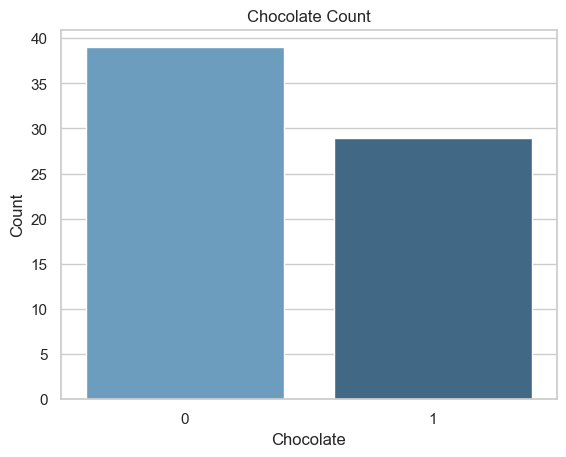

<Figure size 640x480 with 0 Axes>

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='chocolate', data=train_df, palette='Blues_d')
plt.xlabel('Chocolate')
plt.ylabel('Count')
plt.title('Chocolate Count')
plt.show()
plt.savefig('DATA/count_plot.png')

In [31]:
count_no_choc = len(train_df[train_df['chocolate']==0])
count_choc = len(train_df[train_df['chocolate']==1])
pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
print("percentage of no chocolate is", pct_of_no_choc*100)
pct_of_choc = count_choc/(count_no_choc+count_choc)
print("percentage of chocolate", pct_of_choc*100)


percentage of no chocolate is 57.35294117647059
percentage of chocolate 42.64705882352941


In [32]:
train_df.groupby('chocolate').mean()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,,,,,,,,,,,
0,0.74359,0.076923,0.051282,0.025641,0.000000,0.282051,0.025641,0.666667,0.448462,0.365385,40.924683
1,0.00000,0.241379,0.344828,0.172414,0.206897,0.000000,0.586207,0.275862,0.527517,0.679172,61.825308


In [33]:
train_df.groupby('caramel').mean()

,fruity,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
caramel,,,,,,,,,,,
0,0.482759,0.172414,0.051724,0.068966,0.172414,0.224138,0.534483,0.459534,0.482103,48.642787,0.37931
1,0.100000,0.200000,0.300000,0.200000,0.100000,0.500000,0.300000,0.613500,0.598400,56.771491,0.70000


Text(0.5, 1.0, 'Correlation Matrix for Candy Features')

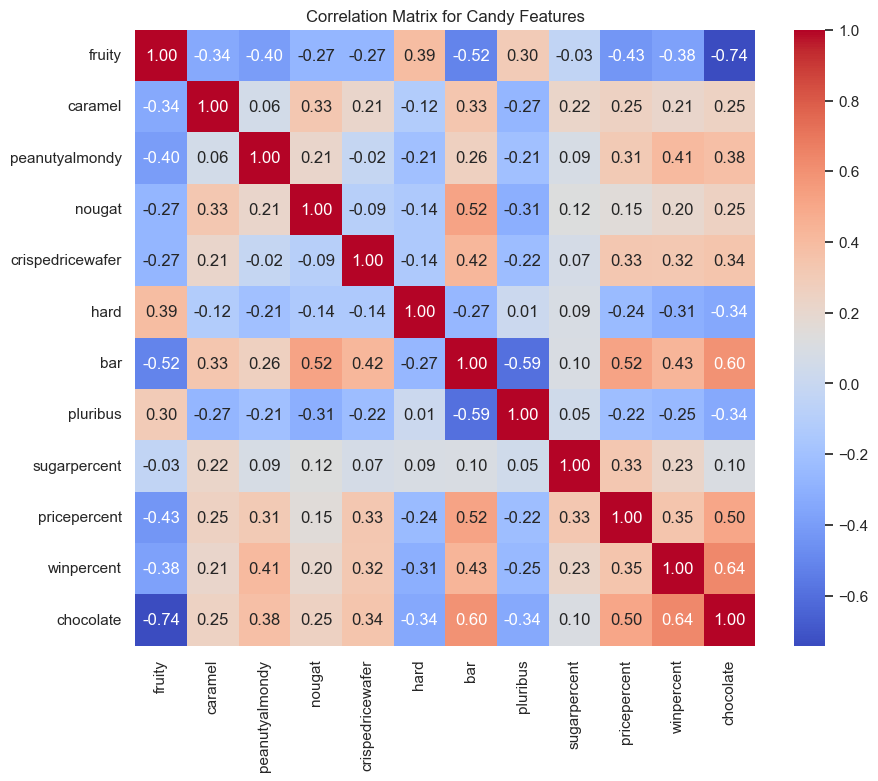

In [34]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Candy Features')



sns.heatmap(correlation_matrix, ...):

This is the main function call to create the heatmap using Seaborn.
correlation_matrix is the input data: a Pandas DataFrame or NumPy array containing the correlation coefficients.
annot=True:

This parameter controls whether numerical values (the correlation coefficients) are displayed in each cell of the heatmap. Setting it to True shows these values, making the plot more informative.
cmap='coolwarm':

This specifies the colormap to use for the heatmap. The 'coolwarm' colormap is a popular choice for correlation matrices because it intuitively represents:
Positive correlations with warm colors (red, orange, yellow).
Negative correlations with cool colors (blue, green).
Zero or near-zero correlations with neutral colors (white).
fmt=".2f":

This sets the format for the annotation (the numbers displayed in each cell). In this case, .2f means the values will be displayed with two decimal places.

### Model Development and Prediction
Import the Scikit Learn Logistic Regression module
Fit model on the train set using fit() then perform prediction on test set using prediction

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

### Evaluate model using confusion matrix
This is basically looking at how well your model did on predictions

In [36]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
cnf_matrix

array([[8, 3],
       [1, 5]], dtype=int64)

### Visualize CFM (confusion matrix) using a heatmap

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

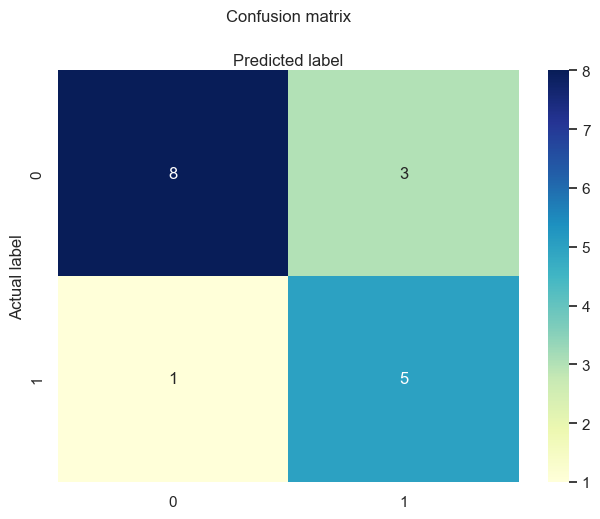

In [38]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### CFM evaluation metrics Accuracy, Precision, Recall

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7647058823529411
Precision: 0.8333333333333334
Recall: 0.625


### ROC (Receiver Operation Characteristic) Curve
Plotting true positive rate against false positie rate. Shows tradeoff between sensitivity and specificity.

### What is AUC - ROC Curve? (credit https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
#### AUC - ROC curve
Is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

* The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

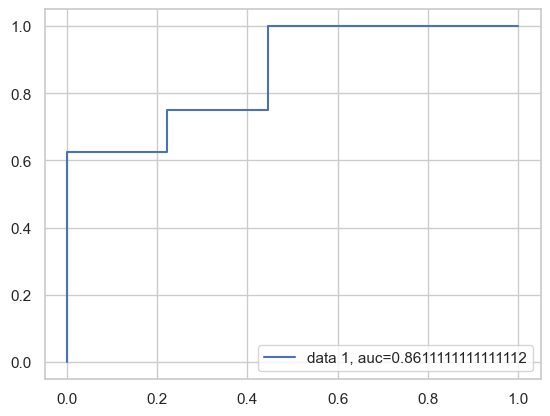

In [40]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

An AUC (Area Under the Curve) value of 1 represents a perfect classifier. AUC is a popular evaluation metric used in binary classification tasks, typically in the context of a receiver operating characteristic (ROC) curve.

The ROC curve is created by plotting the true positive rate (sensitivity/recall) against the false positive rate (1 - specificity) at various classification thresholds. The AUC value represents the area under this curve. It measures the performance of a binary classifier across all possible classification thresholds.

An AUC value of 1 indicates that the classifier has achieved a perfect separation between positive and negative instances. It means that the classifier has correctly ranked all positive instances higher than negative instances across all possible thresholds. In other words, the model has excellent discriminatory power, and there are no false positives or false negatives in its predictions.

However, it's important to note that achieving an AUC value of 1 is quite rare in practice, especially for real-world datasets. In most cases, classifiers will have AUC values less than 1, indicating some level of misclassification or overlap between positive and negative instances. Nevertheless, the closer the AUC value is to 1, the better the classifier's performance is considered to be